In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

# Load the data
data = pd.read_csv('mtcars.csv')
data.head(6)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


**Question 1**

In [38]:
# Regardless whether we know or not the shape of the distribution of a random variable, an interval centered around the mean whose total length 
# is 8 standard deviations is guaranteed to include at least a certain percantage of data. This guaranteed minimal value as a percentage is
k = 8
percent = 1 - (1/(k**2))
print("guranteed percent: ", percent * 100)

guranteed percent:  98.4375


**Question 2**

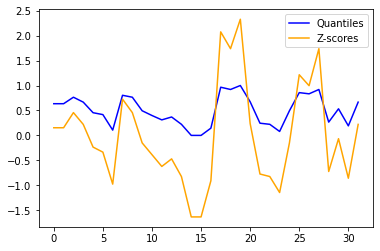

In [39]:
from sklearn.preprocessing import QuantileTransformer as QT
from sklearn.preprocessing import StandardScaler as SS

ss = SS()
qt = QT(n_quantiles=10)

zs = ss.fit_transform(data[['mpg']])
qs = qt.fit_transform(data[['mpg']])


plt.plot(qs, color='blue', label="Quantiles")
plt.plot(zs, color='orange', label="Z-scores")
plt.legend()
plt.show()

Zscores use the mean as the center of the data, while Quantiles use the median as the center of the data (50th percentile). This difference leads me to believe zscores are not involved in the calculation of quanitles

In [40]:
sumx = np.sum(qs)
sumy = np.sum(zs)
sumx

16.05768647996048

**Question 3**

In [41]:
# In the 'mtcars' dataset the zscore of an 18.1mpg car is 
zscore = (18.1 - np.mean(data[['mpg']]))/np.std(data[['mpg']])
print("zscore of an 18.1 mpg car is: ", zscore)

zscore of an 18.1 mpg car is:  mpg   -0.335572
dtype: float64


In [42]:
from sklearn.preprocessing import StandardScaler as SS

ss = SS()
dat = ss.fit_transform(data[['mpg']])
dat[5]

array([-0.33557233])

**Question 4**

In [43]:
# In the 'mtcars' dataset determine the percentile of a car that weighs 3520bs is (round up to the nearest percentage point)
print('21st encounter has weight: ' + str(data.wt[21]*1000) + ' pounds')

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=32)
dat = qt.fit_transform(data[['wt']])
print("percentile is: " + str(dat[21]*100))

21st encounter has weight: 3520.0 pounds
percentile is: [67.74193548]


In [44]:
# Double check
x = np.percentile(data.wt, 68)
print(str(x*1000) + " pounds")

3524.0 pounds


**Question 5**

Question: A finite sum of squared quantities that depends on some parameters (weights), always has a minimum value.

Answer: I think this is TRUE because there is always a solution to an OLS problem. 
There could be multiple sets of weights that proovide equally small values, 
but there will always be a minimum value, regardless of whether it is a unique solution or not

**Question 6**

In [45]:
# For the 'mtcars' data set use a linear model to predict the mileage of a car whose weight is 2800lbs. 
# The answer with only the first two decimal places and no rounding is:
ss = SS()

X = data[['wt']]
y = data[['mpg']]

from sklearn.linear_model import LinearRegression as LR
lin_reg = LR()
lin_reg = lin_reg.fit(X, y)

print("Pedicted mileage to two decimals: %0.2f" % lin_reg.predict([[2.8]]))

Pedicted mileage to two decimals: 22.32


**Question 7**

In [56]:
# In this problem you will use the gradient descent algorithm as presented in the 'Linear-regression-demo' notebook. 
# For the 'mtcars' data set if the input variable is the weight of the car and the output variable is the mileage, 
# then (slightly) modify the gradient descent algorithm to compute the minimum sum of squared residuals. If, 
# for running the gradient descent algorithm, you consider the learning_rate = 0.01, the number of iterations = 10000 and the initial slope 
# and intercept equal to 0, then the optimal value of the sum of the squared residuals is


def compute_cost(b, m, data):
    total_cost = 0
    
    # number of datapoints in training data
    N = float(len(data))
    
    # Compute sum of squared errors
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    # Return average of squared error
    return total_cost/(2*N)

def step_gradient(b_current, m_current, data, alpha):
    """takes one step down towards the minima
    
    Args:
        b_current (float): current value of b
        m_current (float): current value of m
        data (np.array): array containing the training data (x,y)
        alpha (float): learning rate / step size
    
    Returns:
        tuple: (b,m) new values of b,m
    """
    
    m_gradient = 0
    b_gradient = 0
    N = float(len(data))

    # Calculate Gradient
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    # Update current m and b
    m_updated = m_current - alpha * m_gradient
    b_updated = b_current - alpha * b_gradient

    #Return updated parameters
    return b_updated, m_updated

def gradient_descent(data, starting_b, starting_m, learning_rate, num_iterations):
    """runs gradient descent
    
    Args:
        data (np.array): training data, containing x,y
        starting_b (float): initial value of b (random)
        starting_m (float): initial value of m (random)
        learning_rate (float): hyperparameter to adjust the step size during descent
        num_iterations (int): hyperparameter, decides the number of iterations for which gradient descent would run
    
    Returns:
        list : the first and second item are b, m respectively at which the best fit curve is obtained, the third and fourth items are two lists, which store the value of b,m as gradient descent proceeded.
    """

    # initial values
    b = starting_b
    m = starting_m
    
    # to store the cost after each iteration
    cost_graph = []
    
    # to store the value of b -> bias unit, m-> slope of line after each iteration (pred = m*x + b)
    b_progress = []
    m_progress = []
    
    # For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, data))
        b, m = step_gradient(b, m, data, learning_rate)
        b_progress.append(b)
        m_progress.append(m)
        
    return [b, m, np.min(cost_graph), b_progress,m_progress]

In [57]:
input_vals = data[['wt']].values
output_vals=data[['mpg']].values
dat = np.concatenate((input_vals, output_vals), axis=1)

In [62]:
initial_b = 0
initial_m = 0
learning_rate = 0.01
num_iterations = 10000

b, m, cost_graph,b_progress,m_progress = gradient_descent(dat, initial_b, initial_m, learning_rate, num_iterations)

# print minimum cost
print("Minimum cost: ", cost_graph)
print("\n")

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, dat))

Minimum cost:  4.348780274117981


Optimized b: 37.285117303091454
Optimized m: -5.344469026915932
Minimized cost: 4.3487802741179715


**Question 8**

Question: (True/False) If we have one input variable and one output, the process of determining the line of best fit may not require the calculation of the intercept inside the gradient descent algorithm.

Answer: I believe this is False because the value of the intercept is what translates the line up and down. Even if the slope is perfect the line could be very far away if the intercept is nonexistent. 

**Queustion 9**

Question: For the line of regression in the case of the example we discussed with the 'mtcars' data set the meaning of the intercept is

Answer: This is the mileage of a small car. Wt was the input feature and mpg is the target feature. As the weight gets closer and closer to zero (meaning $\beta_1 x \rightarrow 0$), only the intercept plays a role in predicting the mpg of the car. This means the algorithm believes a small car with almost zero weight would have a mpg nearly equal to the intercept

**Question 10**

In [51]:
# The slope of the regression line always remains the same if we scale the data by z-scores.

from sklearn.linear_model import LinearRegression as LR
lin_reg= LR()
lin_reg_z = LR()
ss = SS()

X = data[['wt']]
Xz = ss.fit_transform(data[['wt']])
y = data[['mpg']]
yz = ss.fit_transform(data[['mpg']])

lin_reg.fit(X, y)
lin_reg_z.fit(Xz, yz)

print("No scaling slope: %0.2f" % lin_reg.coef_)
print("zscores scaling slope: %0.2f" % lin_reg_z.coef_)

No scaling slope: -5.34
zscores scaling slope: -0.87


As we can see, the slope changed when we scaled by z-scores. This highlights that the staement above is FALSE, and it doesn't always remain the same